<a href="https://colab.research.google.com/github/EduardoMoraesRitter/CA_MU_DS_VINCE/blob/master/teste_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/CA_MU_DS_VINCE/master/dado_municipios%20.csv', encoding='UTF-8', error_bad_lines=False, sep=';') 
train

,Cod_IBGE,Cod_CNES,Municipio,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Total_Doses_Aplicadas,Qtd_Estabelecimentos,Total_Equip_existente,Total_Equip_em uso,Total_Medicos,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade
0,3500105,350010,Adamantina,33894,5218,4059,17219,7398,16326,17568,96.38,99.76,99.89,99.03,13419,140,336,284,145.0,85.12,11.63,778.44,0.790,0.852,0.750,0.772,35,66.5
1,3500204,350020,Adolfo,3447,525,458,1703,761,1707,1740,92.52,96.76,99.72,95.93,3263,5,32,31,5.0,16.88,19.23,588.02,0.730,0.844,0.648,0.710,388,60.1
2,3500303,350030,Aguaí,35608,7075,5215,18073,5245,17889,17719,92.21,99.29,99.66,98.87,16257,64,68,66,65.0,76.50,16.06,540.88,0.715,0.858,0.606,0.703,502,27.0
3,3500402,350040,Águas da Prata,7797,1174,994,3900,1729,3830,3967,92.19,95.84,99.38,87.99,3050,4,25,25,18.0,57.33,25.32,726.28,0.781,0.886,0.716,0.750,62,57.2
4,3500501,350050,Águas de Lindóia,18374,3506,2450,9143,3275,8944,9430,99.10,93.54,98.74,90.33,8196,41,174,161,46.0,311.10,8.37,680.22,0.745,0.846,0.675,0.725,265,66.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,355700,Votorantim,119824,23682,18194,61570,16378,59303,60521,96.19,98.38,99.80,95.94,57667,103,683,662,68.0,667.40,13.64,643.20,0.767,0.838,0.747,0.720,127,35.5
641,3557105,355710,Votuporanga,91760,14260,11418,48879,17203,44664,47096,97.20,99.50,99.79,98.95,59395,224,1338,1267,279.0,224.74,8.61,808.00,0.790,0.857,0.744,0.772,35,50.0
642,3557154,355715,Zacarias,2560,414,351,1314,481,1271,1289,85.27,99.06,100.00,97.02,1089,3,41,36,NaN,8.52,32.26,523.97,0.729,0.826,0.674,0.695,400,60.0
643,3557204,355720,Chavantes,12223,2507,1803,5815,2098,6055,6168,94.29,100.00,99.91,98.00,5682,20,96,89,6.0,65.80,5.29,586.48,0.729,0.828,0.655,0.713,400,50.9


In [0]:
train.isnull().sum()

Cod_IBGE                  0
Cod_CNES                  0
Municipio                 0
Populacao                 0
Criancas                  0
Jovens                    0
Adultos                   0
Idosos                    0
Populacao_Masculina       0
Populacao_Feminina        0
Grau_de_Urbanizacao       0
Abastecimento_de_Agua     0
Coleta_de_Lixo            0
Esgoto_Sanitario          0
Total_Doses_Aplicadas     0
Qtd_Estabelecimentos      0
Total_Equip_existente     0
Total_Equip_em uso        0
Total_Medicos            28
Densidade_demográfica     0
Mortalidade_infantil      0
Renda_per_capita          0
IDHM                      0
IDHM_Longevidade          0
IDHM_Educacao             0
IDHM_Renda                0
IDHM_Ranking              0
Indice_Futuridade         0
dtype: int64

In [0]:
train['Total_Medicos'].describe()

count      617.000000
mean       192.735818
std       1740.708049
min          1.000000
25%          4.000000
50%         13.000000
75%         57.000000
max      42030.000000
Name: Total_Medicos, dtype: float64

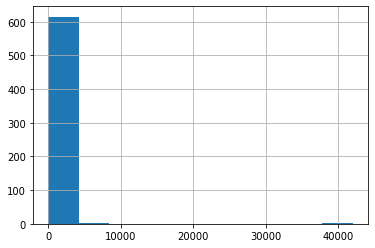

In [0]:
train['Total_Medicos'].hist()

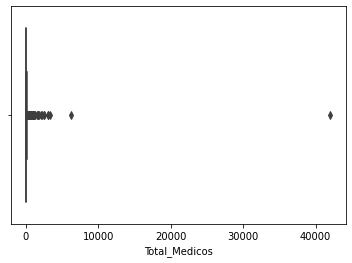

In [0]:
sns.boxplot(x = train['Total_Medicos'])

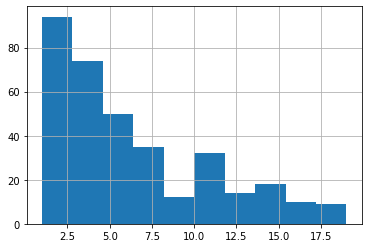

In [0]:
filter = train['Total_Medicos'] < 20
train[filter]['Total_Medicos'].hist()

In [0]:
train['Razao_Medico_Pop'] = (train['Total_Medicos'] * 1000)/ train['Populacao']

In [0]:
train['Razao_Medico_Pop'].describe()

count    617.000000
mean       1.316130
std        1.101992
min        0.054215
25%        0.571592
50%        0.984601
75%        1.788577
max        8.622950
Name: Razao_Medico_Pop, dtype: float64

In [0]:
import numpy as np
train['Razao_Medico_Pop'] = train['Razao_Medico_Pop'].replace(np.nan, train['Razao_Medico_Pop'].mean())

In [0]:
train.head()

,Cod_IBGE,Cod_CNES,Municipio,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Total_Doses_Aplicadas,Qtd_Estabelecimentos,Total_Equip_existente,Total_Equip_em uso,Total_Medicos,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade,Razao_Medico_Pop
0,3500105,350010,Adamantina,33894,5218,4059,17219,7398,16326,17568,96.38,99.76,99.89,99.03,13419,140,336,284,145.0,85.12,11.63,778.44,0.790,0.852,0.750,0.772,35,66.5,4.278043
1,3500204,350020,Adolfo,3447,525,458,1703,761,1707,1740,92.52,96.76,99.72,95.93,3263,5,32,31,5.0,16.88,19.23,588.02,0.730,0.844,0.648,0.710,388,60.1,1.450537
2,3500303,350030,Aguaí,35608,7075,5215,18073,5245,17889,17719,92.21,99.29,99.66,98.87,16257,64,68,66,65.0,76.50,16.06,540.88,0.715,0.858,0.606,0.703,502,27.0,1.825432
3,3500402,350040,Águas da Prata,7797,1174,994,3900,1729,3830,3967,92.19,95.84,99.38,87.99,3050,4,25,25,18.0,57.33,25.32,726.28,0.781,0.886,0.716,0.750,62,57.2,2.308580
4,3500501,350050,Águas de Lindóia,18374,3506,2450,9143,3275,8944,9430,99.10,93.54,98.74,90.33,8196,41,174,161,46.0,311.10,8.37,680.22,0.745,0.846,0.675,0.725,265,66.8,2.503538


In [0]:
train_simples = train[['Criancas','IDHM_Ranking']]

train_simples

,Criancas,IDHM_Ranking
0,5218,35
1,525,388
2,7075,502
3,1174,62
4,3506,265
...,...,...
640,23682,127
641,14260,35
642,414,400
643,2507,400


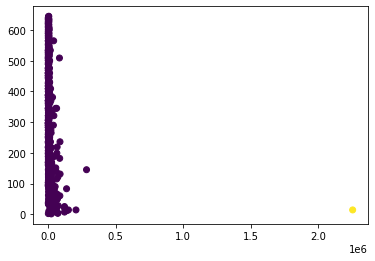

In [0]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as pl
import seaborn as sns

model = AgglomerativeClustering(n_clusters=2)
model.fit(train_simples)

pl.scatter(train_simples['Criancas'], train_simples['IDHM_Ranking'], c = model.labels_)

In [0]:
from sklearn.metrics import silhouette_score

silhouette_list = []
k_list = range(2, 20)

for p in k_list:
    clusterer = AgglomerativeClustering(n_clusters=p, linkage="average")
    clusterer.fit(train_simples)
    s = round(silhouette_score(train_simples, clusterer.labels_), 4)
    silhouette_list.append(s)
    print("silhouette_score =", s, " for k=", p)

key = silhouette_list.index(max(silhouette_list))
k = k_list.__getitem__(key)

print("Best=", max(silhouette_list), " for k=", k)

silhouette_score = 0.992  for k= 2
silhouette_score = 0.9412  for k= 3
silhouette_score = 0.8984  for k= 4
silhouette_score = 0.8881  for k= 5
silhouette_score = 0.8493  for k= 6
silhouette_score = 0.7856  for k= 7
silhouette_score = 0.7875  for k= 8
silhouette_score = 0.7885  for k= 9
silhouette_score = 0.7562  for k= 10
silhouette_score = 0.7557  for k= 11
silhouette_score = 0.7534  for k= 12
silhouette_score = 0.7471  for k= 13
silhouette_score = 0.7489  for k= 14
silhouette_score = 0.676  for k= 15
silhouette_score = 0.6753  for k= 16
silhouette_score = 0.6747  for k= 17
silhouette_score = 0.6808  for k= 18
silhouette_score = 0.6792  for k= 19
Best= 0.992  for k= 2


In [0]:
train.dtypes

Cod_IBGE                   int64
Cod_CNES                   int64
Municipio                 object
Populacao                  int64
Criancas                   int64
Jovens                     int64
Adultos                    int64
Idosos                     int64
Populacao_Masculina        int64
Populacao_Feminina         int64
Grau_de_Urbanizacao      float64
Abastecimento_de_Agua    float64
Coleta_de_Lixo           float64
Esgoto_Sanitario         float64
Total_Doses_Aplicadas      int64
Qtd_Estabelecimentos       int64
Total_Equip_existente      int64
Total_Equip_em uso         int64
Total_Medicos            float64
Densidade_demográfica    float64
Mortalidade_infantil      object
Renda_per_capita         float64
IDHM                     float64
IDHM_Longevidade         float64
IDHM_Educacao            float64
IDHM_Renda               float64
IDHM_Ranking               int64
Indice_Futuridade        float64
Razao_Medico_Pop         float64
dtype: object

In [0]:
train['Mortalidade_infantil'].replace('-', np.nan, inplace=True)
train['Mortalidade_infantil'] = train['Mortalidade_infantil'].astype(float)

In [0]:
train['Mortalidade_infantil'].replace(np.nan, train['Mortalidade_infantil'].mean(), inplace=True)

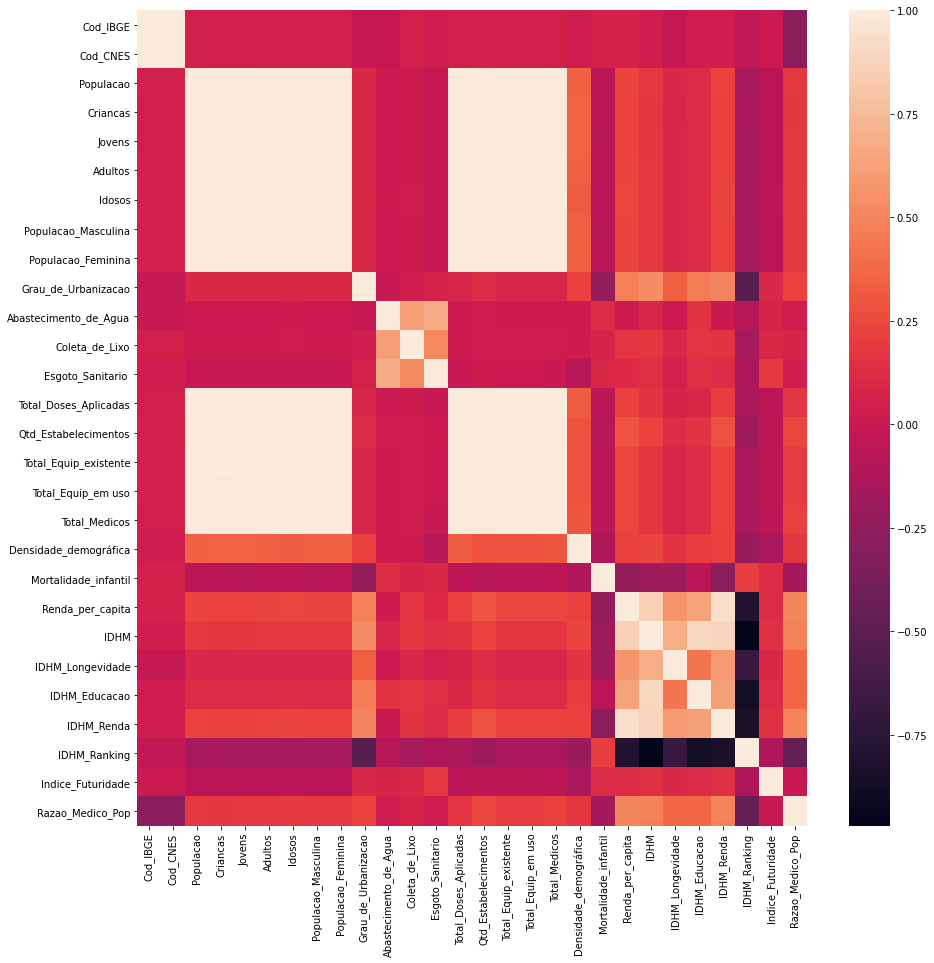

In [0]:
pl.figure(figsize=(15,15))
sns.heatmap(train.corr())

In [0]:
train.dtypes

Cod_IBGE                   int64
Cod_CNES                   int64
Municipio                 object
Populacao                  int64
Criancas                   int64
Jovens                     int64
Adultos                    int64
Idosos                     int64
Populacao_Masculina        int64
Populacao_Feminina         int64
Grau_de_Urbanizacao      float64
Abastecimento_de_Agua    float64
Coleta_de_Lixo           float64
Esgoto_Sanitario         float64
Total_Doses_Aplicadas      int64
Qtd_Estabelecimentos       int64
Total_Equip_existente      int64
Total_Equip_em uso         int64
Total_Medicos            float64
Densidade_demográfica    float64
Mortalidade_infantil     float64
Renda_per_capita         float64
IDHM                     float64
IDHM_Longevidade         float64
IDHM_Educacao            float64
IDHM_Renda               float64
IDHM_Ranking               int64
Indice_Futuridade        float64
Razao_Medico_Pop         float64
dtype: object

In [0]:
a = ['Criancas','Jovens','Adultos','Idosos','Populacao_Masculina','Populacao_Feminina','Total_Doses_Aplicadas',]

for column in a:
  train[column] = train[column]/train['Populacao']
train.head()

,Cod_IBGE,Cod_CNES,Municipio,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Total_Doses_Aplicadas,Qtd_Estabelecimentos,Total_Equip_existente,Total_Equip_em uso,Total_Medicos,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade,Razao_Medico_Pop
0,3500105,350010,Adamantina,33894,0.153951,0.119756,0.508025,0.218269,0.481678,0.518322,96.38,99.76,99.89,99.03,0.395911,140,336,284,145.0,85.12,11.63,778.44,0.790,0.852,0.750,0.772,35,66.5,4.278043
1,3500204,350020,Adolfo,3447,0.152306,0.132869,0.494053,0.220772,0.495213,0.504787,92.52,96.76,99.72,95.93,0.946620,5,32,31,5.0,16.88,19.23,588.02,0.730,0.844,0.648,0.710,388,60.1,1.450537
2,3500303,350030,Aguaí,35608,0.198691,0.146456,0.507554,0.147298,0.502387,0.497613,92.21,99.29,99.66,98.87,0.456555,64,68,66,65.0,76.50,16.06,540.88,0.715,0.858,0.606,0.703,502,27.0,1.825432
3,3500402,350040,Águas da Prata,7797,0.150571,0.127485,0.500192,0.221752,0.491215,0.508785,92.19,95.84,99.38,87.99,0.391176,4,25,25,18.0,57.33,25.32,726.28,0.781,0.886,0.716,0.750,62,57.2,2.308580
4,3500501,350050,Águas de Lindóia,18374,0.190813,0.133341,0.497605,0.178241,0.486775,0.513225,99.10,93.54,98.74,90.33,0.446065,41,174,161,46.0,311.10,8.37,680.22,0.745,0.846,0.675,0.725,265,66.8,2.503538


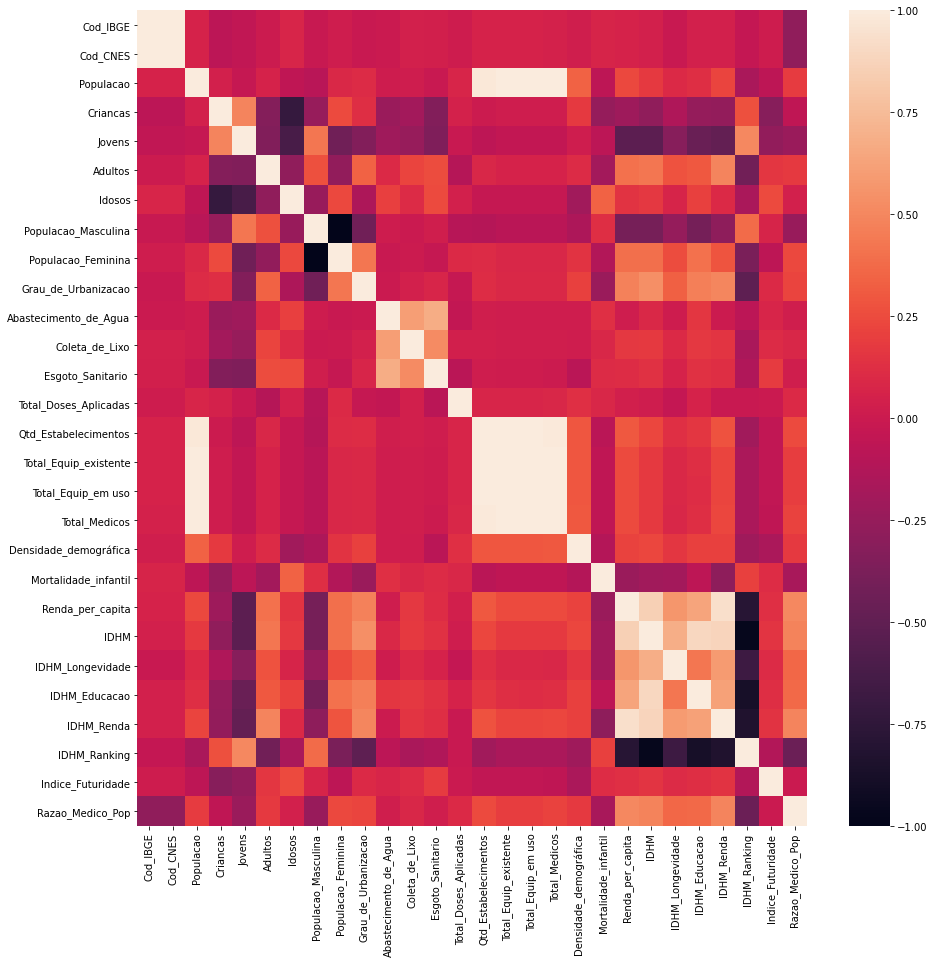

In [0]:
pl.figure(figsize=(15,15))
sns.heatmap(train.corr())

In [0]:
train['Total_Equip_em uso'] = train['Total_Equip_em uso']/train['Total_Equip_existente']

In [0]:
b = ['Qtd_Estabelecimentos','Total_Equip_existente']
for column in b:
  train[column] = (train[column]*1000)/train['Populacao']
train.head()

,Cod_IBGE,Cod_CNES,Municipio,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Total_Doses_Aplicadas,Qtd_Estabelecimentos,Total_Equip_existente,Total_Equip_em uso,Total_Medicos,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade,Razao_Medico_Pop
0,3500105,350010,Adamantina,33894,0.153951,0.119756,0.508025,0.218269,0.481678,0.518322,96.38,99.76,99.89,99.03,0.395911,4.130525,9.913259,0.845238,145.0,85.12,11.63,778.44,0.790,0.852,0.750,0.772,35,66.5,4.278043
1,3500204,350020,Adolfo,3447,0.152306,0.132869,0.494053,0.220772,0.495213,0.504787,92.52,96.76,99.72,95.93,0.946620,1.450537,9.283435,0.968750,5.0,16.88,19.23,588.02,0.730,0.844,0.648,0.710,388,60.1,1.450537
2,3500303,350030,Aguaí,35608,0.198691,0.146456,0.507554,0.147298,0.502387,0.497613,92.21,99.29,99.66,98.87,0.456555,1.797349,1.909683,0.970588,65.0,76.50,16.06,540.88,0.715,0.858,0.606,0.703,502,27.0,1.825432
3,3500402,350040,Águas da Prata,7797,0.150571,0.127485,0.500192,0.221752,0.491215,0.508785,92.19,95.84,99.38,87.99,0.391176,0.513018,3.206361,1.000000,18.0,57.33,25.32,726.28,0.781,0.886,0.716,0.750,62,57.2,2.308580
4,3500501,350050,Águas de Lindóia,18374,0.190813,0.133341,0.497605,0.178241,0.486775,0.513225,99.10,93.54,98.74,90.33,0.446065,2.231414,9.469903,0.925287,46.0,311.10,8.37,680.22,0.745,0.846,0.675,0.725,265,66.8,2.503538


In [0]:
train.drop(['Cod_CNES','Total_Medicos'], axis=1, inplace=True)

In [0]:
train.rename(columns={'Total_Doses_Aplicadas':'Percent_Doses_Aplicadas', 'Qtd_Estabelecimentos':'Estab_por_mil_Hab', 'Total_Equip_existente':'Equip_por_mil_Hab', 'Total_Equip_em uso':'Percent_Equip_em_uso'}, inplace=True)

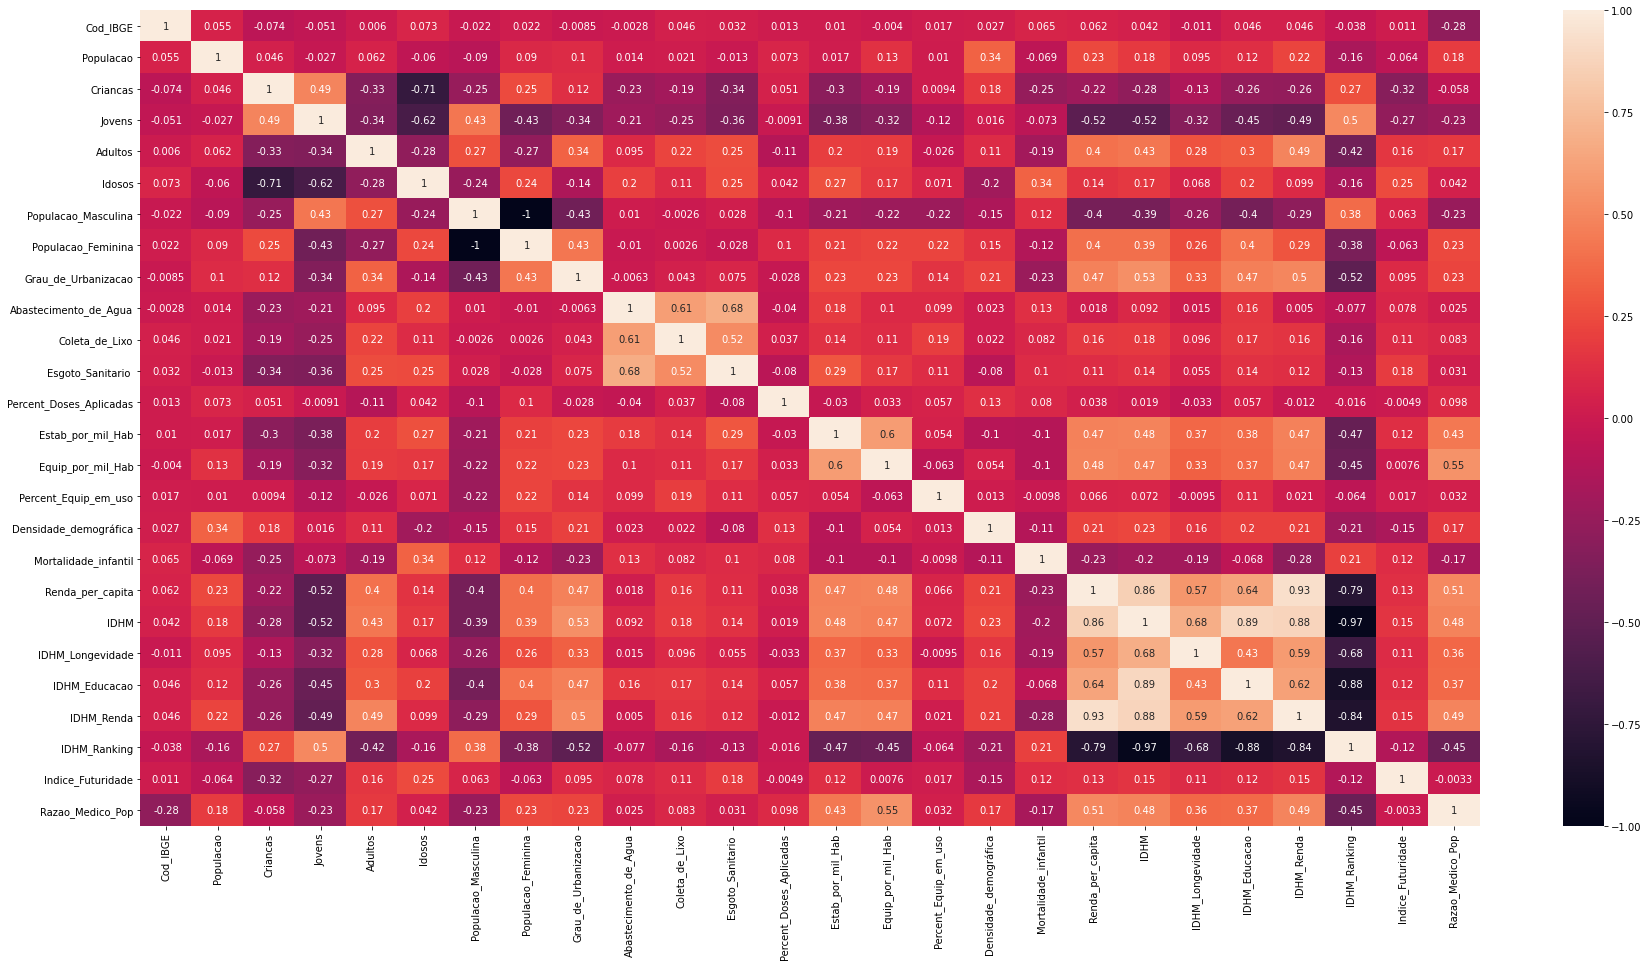

In [0]:
pl.figure(figsize=(30,15))
sns.heatmap(train.corr(), annot=True)

In [0]:
train.dtypes

Cod_IBGE                     int64
Municipio                   object
Populacao                    int64
Criancas                   float64
Jovens                     float64
Adultos                    float64
Idosos                     float64
Populacao_Masculina        float64
Populacao_Feminina         float64
Grau_de_Urbanizacao        float64
Abastecimento_de_Agua      float64
Coleta_de_Lixo             float64
Esgoto_Sanitario           float64
Percent_Doses_Aplicadas    float64
Estab_por_mil_Hab          float64
Equip_por_mil_Hab          float64
Percent_Equip_em_uso       float64
Densidade_demográfica      float64
Mortalidade_infantil       float64
Renda_per_capita           float64
IDHM                       float64
IDHM_Longevidade           float64
IDHM_Educacao              float64
IDHM_Renda                 float64
IDHM_Ranking                 int64
Indice_Futuridade          float64
Razao_Medico_Pop           float64
dtype: object

In [0]:
train_pop = train[['Abastecimento_de_Agua','Coleta_de_Lixo']]

In [0]:
train.drop(['Municipio','Cod_IBGE'], axis=1, inplace=True)

In [0]:
from sklearn.metrics import silhouette_score

silhouette_list = []
k_list = range(2, 20)

for p in k_list:
    clusterer = AgglomerativeClustering(n_clusters=p, linkage="average")
    clusterer.fit(train_pop)
    s = round(silhouette_score(train_pop, clusterer.labels_), 4)
    silhouette_list.append(s)
    print("silhouette_score =", s, " for k=", p)

key = silhouette_list.index(max(silhouette_list))
k = k_list.__getitem__(key)

print("Best=", max(silhouette_list), " for k=", k)

silhouette_score = 0.9014  for k= 2
silhouette_score = 0.8591  for k= 3
silhouette_score = 0.8383  for k= 4
silhouette_score = 0.7543  for k= 5
silhouette_score = 0.7525  for k= 6
silhouette_score = 0.7516  for k= 7
silhouette_score = 0.7509  for k= 8
silhouette_score = 0.7515  for k= 9
silhouette_score = 0.7436  for k= 10
silhouette_score = 0.6697  for k= 11
silhouette_score = 0.6692  for k= 12
silhouette_score = 0.6501  for k= 13
silhouette_score = 0.6449  for k= 14
silhouette_score = 0.6447  for k= 15
silhouette_score = 0.6447  for k= 16
silhouette_score = 0.6488  for k= 17
silhouette_score = 0.586  for k= 18
silhouette_score = 0.5868  for k= 19
Best= 0.9014  for k= 2


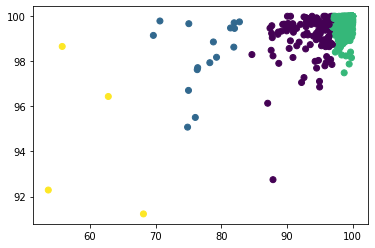

In [0]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as pl
import seaborn as sns

model = AgglomerativeClustering(n_clusters=4)
model.fit(train_pop)

pl.scatter(train_pop['Abastecimento_de_Agua'], train_pop['Coleta_de_Lixo'], c = model.labels_)

KMEANS

Top terms per cluster:

 Cluster 0:
[96.76, 99.72]
[99.76, 99.89]

 Cluster 1:
[96.76, 99.72]
[99.76, 99.89]

 Cluster 2:
[96.76, 99.72]
[99.76, 99.89]


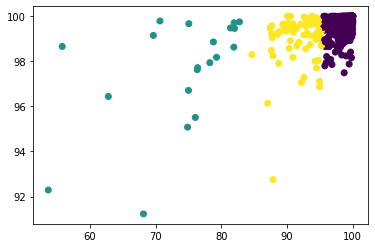

In [0]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=3)
model.fit(train_pop)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("\n Cluster %d:" % i),
    for ind in order_centroids[i, :100]:
        print(train_pop.iloc[ind].tolist())#('   %s' % terms[ind]),
    print


pl.scatter(train_pop.Abastecimento_de_Agua, train_pop.Coleta_de_Lixo, c = model.labels_)

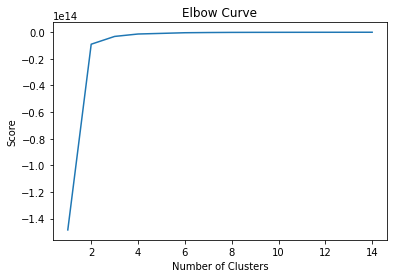

In [0]:
Nc = range(1, 15)
kmeans_list = [KMeans(n_clusters=i) for i in Nc]
#print(kmeans_list)
score = [kmeans_list[i].fit(train).score(train) for i in range(len(kmeans_list))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

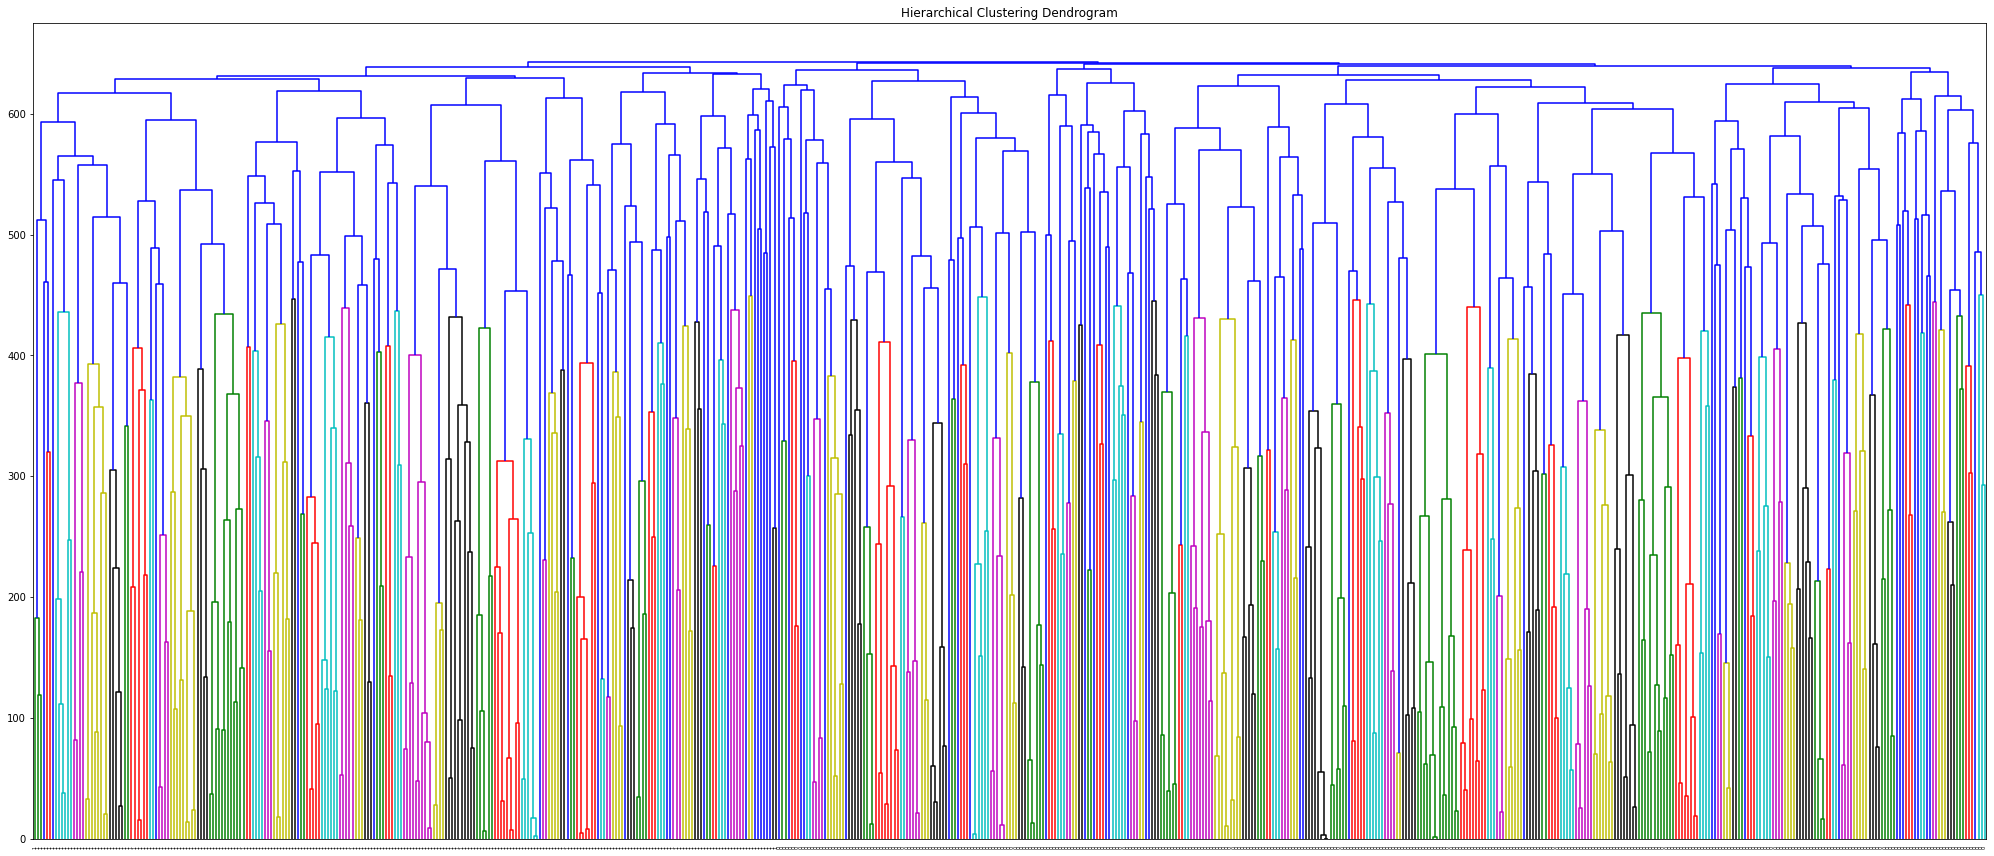

In [0]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(train[:700])
children = model.children_
#print(model.labels_)
#print(children)

distance = np.arange(children.shape[0])
#print(distance)
no_of_observations = np.arange(2, children.shape[0]+2)
#print(no_of_observations)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
#print(linkage_matrix)

plt.figure(figsize=(35, 15))
dendrogram(linkage_matrix, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

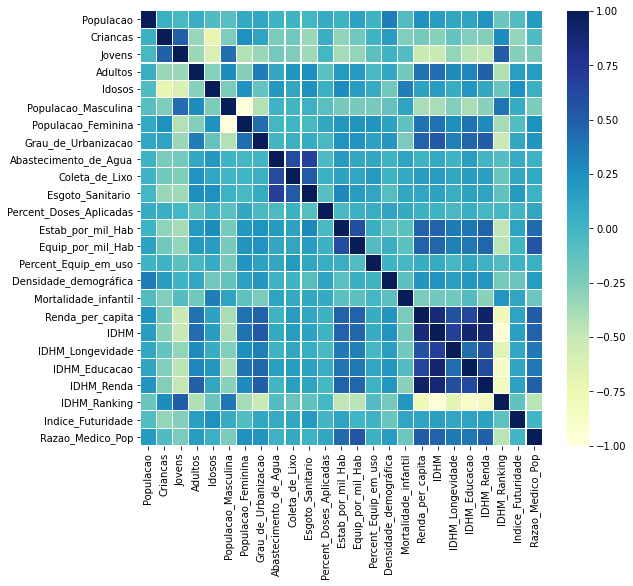

In [0]:
corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

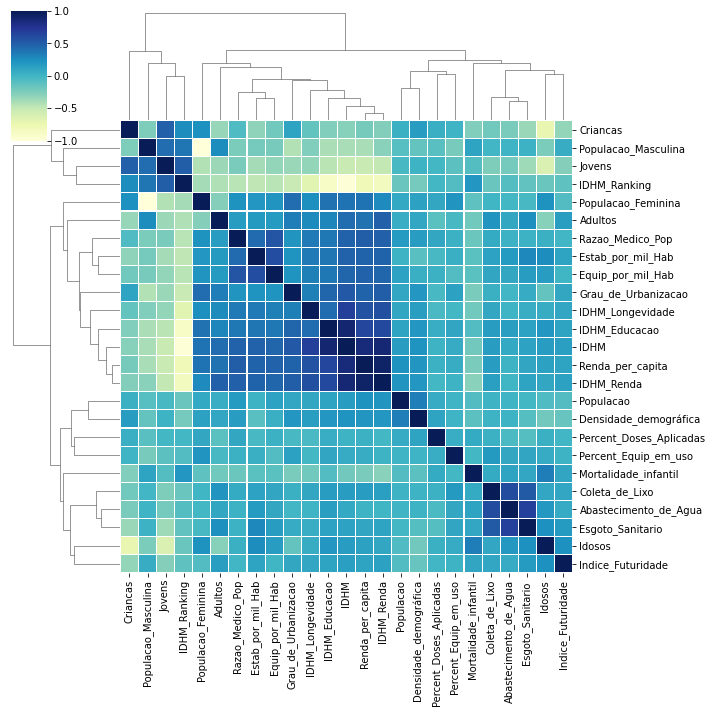

In [0]:
#https://www.geeksforgeeks.org/exploring-correlation-in-python/
corrmat = train.corr()
#sns.figure(figsize=(100,35))
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);#annot=True 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 

In [0]:
train.describe()

,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Percent_Doses_Aplicadas,Estab_por_mil_Hab,Equip_por_mil_Hab,Percent_Equip_em_uso,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade,Razao_Medico_Pop
count,6.450000e+02,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,6.920915e+04,0.181139,0.146875,0.504631,0.167355,0.501774,0.498226,86.904403,97.269643,99.528248,90.553581,0.499056,1.619959,7.232976,0.944162,340.737008,19.736275,601.605736,0.739527,0.835992,0.676336,0.716487,320.200000,47.820155,1.316130
std,4.801871e+05,0.023766,0.017903,0.023667,0.034623,0.024260,0.024260,13.363675,5.104341,0.770768,14.866985,0.162016,0.988005,5.058782,0.085805,1333.740076,17.532832,153.463025,0.032477,0.021948,0.048391,0.040270,186.260367,12.023343,1.077769
min,8.120000e+02,0.063445,0.106693,0.413295,0.082613,0.461492,0.196004,25.890000,53.650000,91.230000,7.370000,0.000000,0.180571,0.300000,0.222222,3.660000,2.740000,205.840000,0.639000,0.775000,0.520000,0.592000,1.000000,15.800000,0.054215
25%,5.534000e+03,0.165538,0.135279,0.492155,0.143147,0.491809,0.494560,82.760000,97.400000,99.470000,89.770000,0.394402,0.928505,3.571429,0.925926,21.890000,9.500000,506.290000,0.719000,0.818000,0.644000,0.691000,160.000000,39.400000,0.590563
50%,1.331900e+04,0.182148,0.145861,0.506358,0.165890,0.498257,0.501743,91.330000,99.010000,99.720000,96.880000,0.478255,1.347911,5.882644,0.965354,41.650000,14.290000,584.660000,0.738000,0.837000,0.678000,0.716000,321.000000,48.300000,1.018589
75%,4.107300e+04,0.197817,0.156241,0.518926,0.188026,0.505440,0.508191,96.060000,99.610000,99.900000,98.710000,0.583588,2.073112,9.458704,1.000000,125.710000,23.260000,674.870000,0.761000,0.853000,0.709000,0.740000,476.000000,56.100000,1.742594
max,1.186966e+07,0.250712,0.290229,0.663337,0.294235,0.803996,0.538508,100.000000,100.000000,100.000000,100.000000,1.244537,6.872028,30.856728,1.000000,14207.570000,166.670000,1578.740000,0.862000,0.890000,0.825000,0.891000,645.000000,86.200000,8.622950


KeyboardInterrupt: ignored

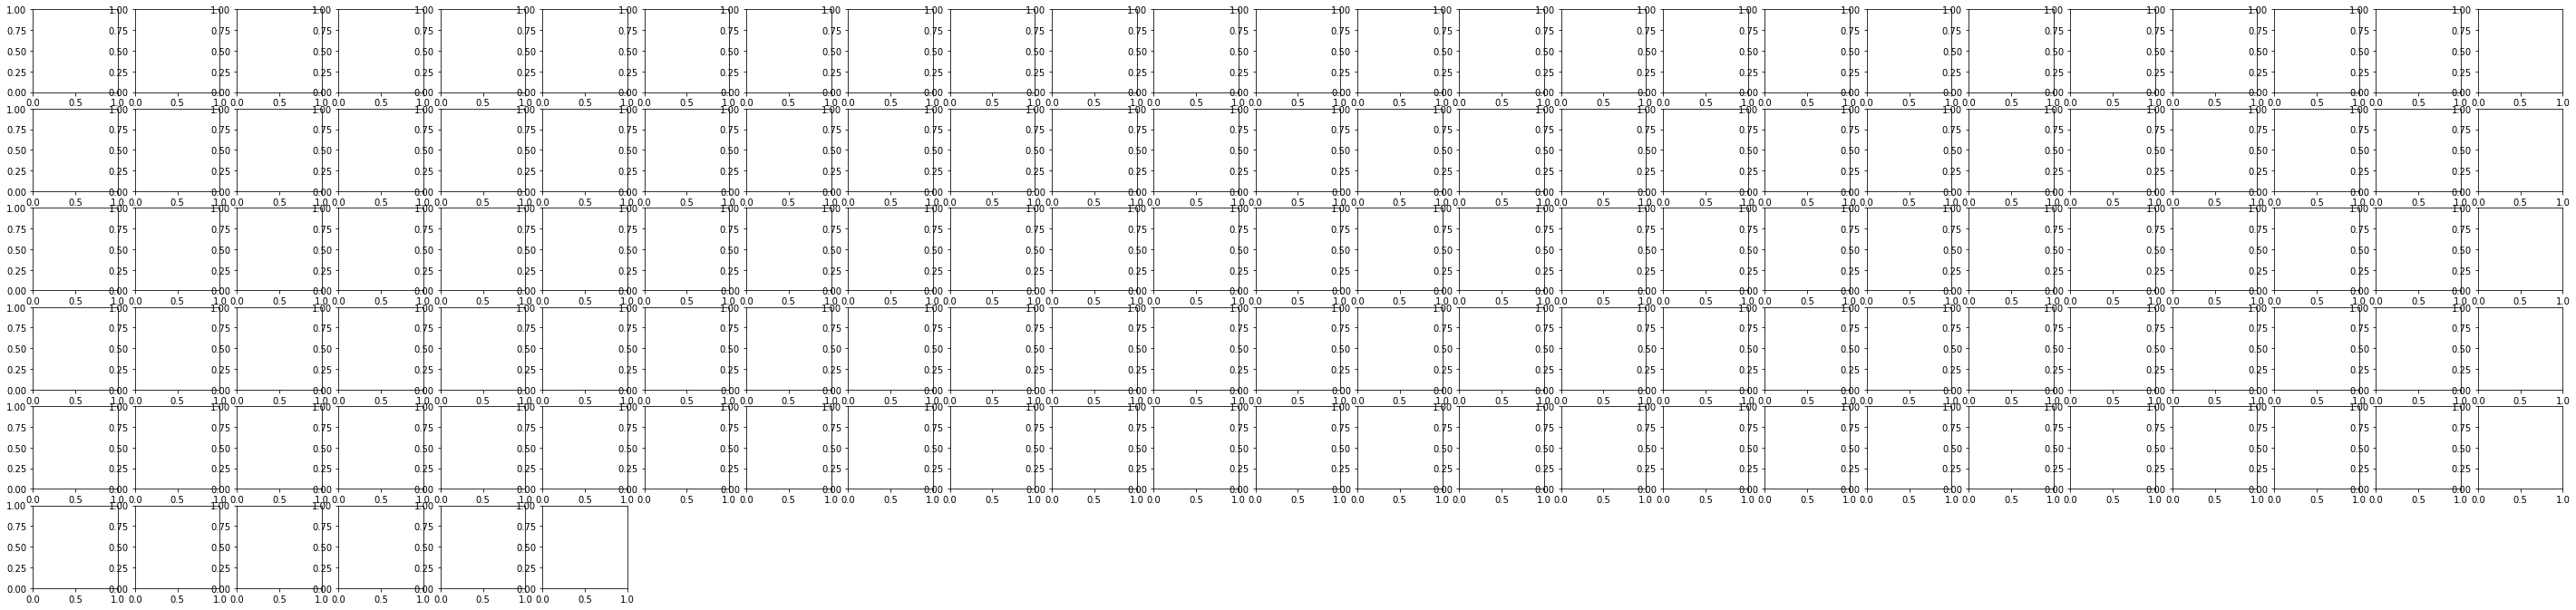

In [0]:
'''from pandas.plotting import scatter_matrix
scatter_matrix(train, alpha=0.2, figsize=(50, 50), diagonal='kde')'''

In [0]:
for column in train:
  if train[column].mean()>=1:
    train[column] = train[column]/float(train[column].max())

In [0]:
#https://www.geeksforgeeks.org/exploring-correlation-in-python/
'''train.drop(['Criancas', 'Populacao_Masculina', 'Jovens', 'IDHM_Ranking'], axis=1, inplace=True)

corrmat = train.corr()
sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.01) '''

In [0]:
train.head()

,Populacao,Criancas,Jovens,Adultos,Idosos,Populacao_Masculina,Populacao_Feminina,Grau_de_Urbanizacao,Abastecimento_de_Agua,Coleta_de_Lixo,Esgoto_Sanitario,Percent_Doses_Aplicadas,Estab_por_mil_Hab,Equip_por_mil_Hab,Percent_Equip_em_uso,Densidade_demográfica,Mortalidade_infantil,Renda_per_capita,IDHM,IDHM_Longevidade,IDHM_Educacao,IDHM_Renda,IDHM_Ranking,Indice_Futuridade,Razao_Medico_Pop
0,0.002856,0.153951,0.119756,0.508025,0.218269,0.481678,0.518322,0.9638,0.9976,0.9989,0.9903,0.395911,0.601063,0.321267,0.845238,0.005991,0.069779,0.493077,0.790,0.852,0.750,0.772,0.054264,0.771462,0.496123
1,0.000290,0.152306,0.132869,0.494053,0.220772,0.495213,0.504787,0.9252,0.9676,0.9972,0.9593,0.946620,0.211078,0.300856,0.968750,0.001188,0.115378,0.372462,0.730,0.844,0.648,0.710,0.601550,0.697216,0.168218
2,0.003000,0.198691,0.146456,0.507554,0.147298,0.502387,0.497613,0.9221,0.9929,0.9966,0.9887,0.456555,0.261546,0.061889,0.970588,0.005384,0.096358,0.342602,0.715,0.858,0.606,0.703,0.778295,0.313225,0.211695
3,0.000657,0.150571,0.127485,0.500192,0.221752,0.491215,0.508785,0.9219,0.9584,0.9938,0.8799,0.391176,0.074653,0.103911,1.000000,0.004035,0.151917,0.460038,0.781,0.886,0.716,0.750,0.096124,0.663573,0.267725
4,0.001548,0.190813,0.133341,0.497605,0.178241,0.486775,0.513225,0.9910,0.9354,0.9874,0.9033,0.446065,0.324710,0.306899,0.925287,0.021897,0.050219,0.430863,0.745,0.846,0.675,0.725,0.410853,0.774942,0.290334


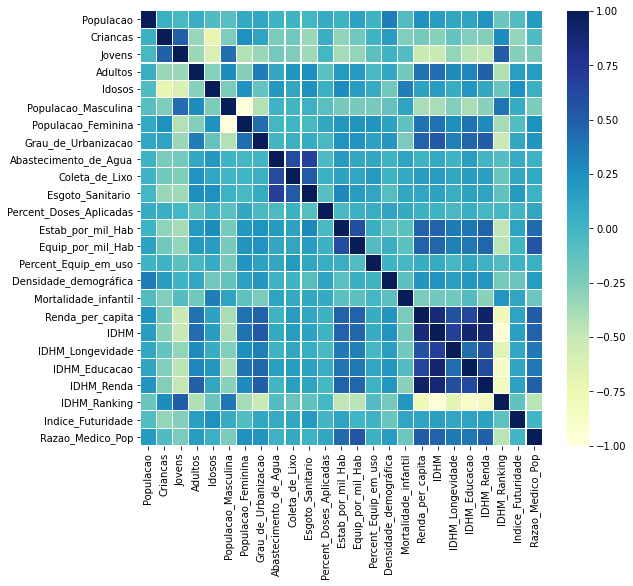

In [0]:
corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

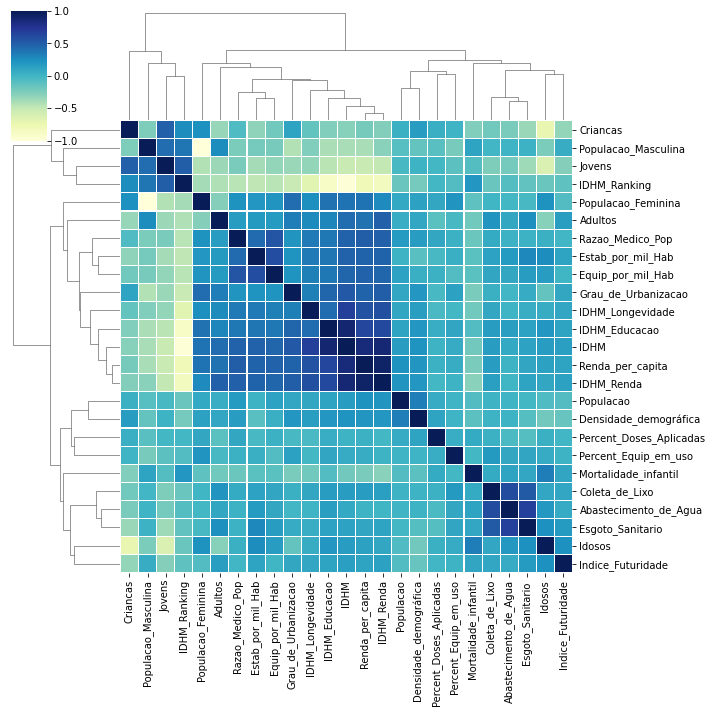

In [0]:
#https://www.geeksforgeeks.org/exploring-correlation-in-python/
corrmat = train.corr()
#sns.figure(figsize=(100,35))
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);#annot=True 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 

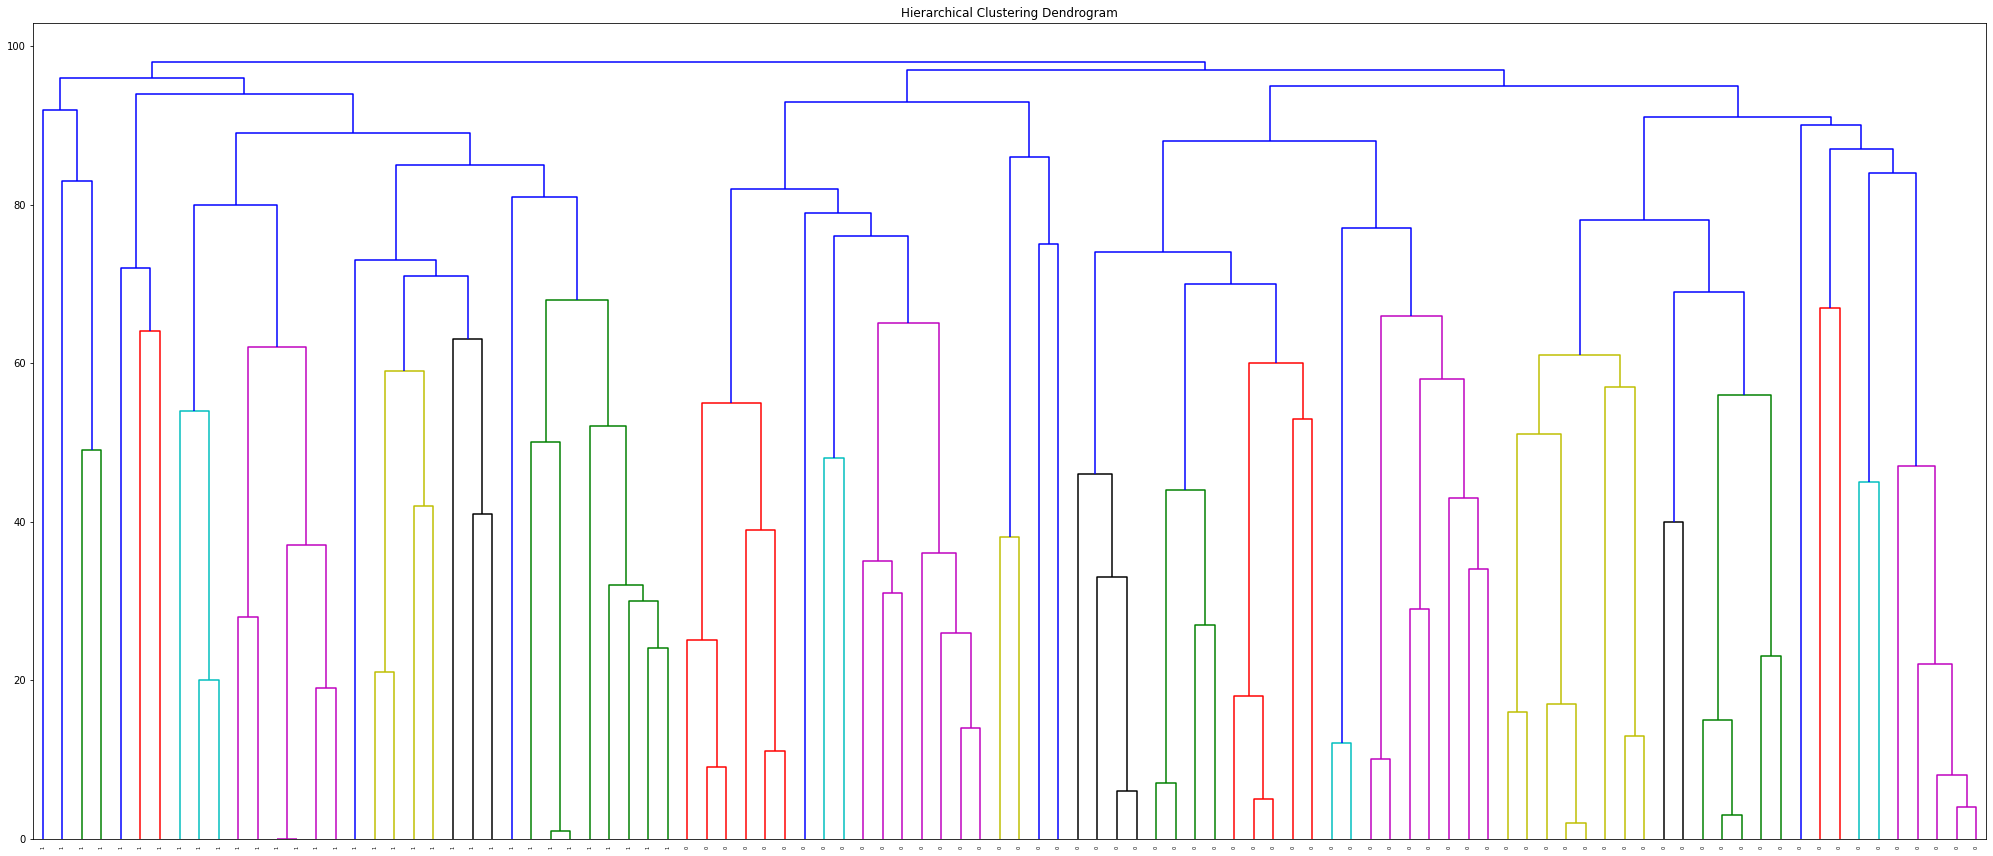

In [0]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(train[:100])
children = model.children_
#print(model.labels_)
#print(children)

distance = np.arange(children.shape[0])
#print(distance)
no_of_observations = np.arange(2, children.shape[0]+2)
#print(no_of_observations)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
#print(linkage_matrix)

plt.figure(figsize=(35, 15))
dendrogram(linkage_matrix, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()